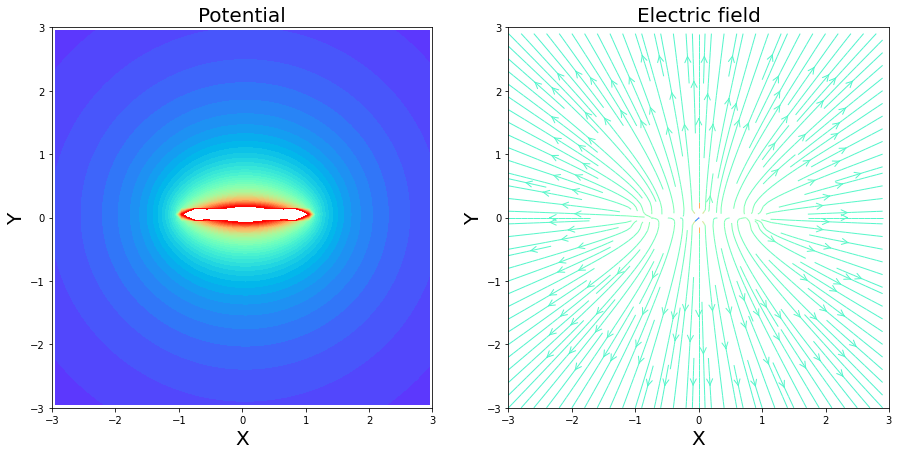

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.special import roots_legendre

N=101  # number of points
Lhalf=1.0  # half-length of the stem
c=1.0  # determine the unit of filed. c= 1/4piepsilon
dx = 0.1  
dy = 0.1

field_x=[]  
field_y=[]
field=[]
potential=[]

#--------defining integrnd-----------
def f(xx,x0,y0):
    return np.exp(-xx**2)/np.sqrt((xx-x0)**2+y0**2)

#-------- finding the root of legendre ---
x,w=roots_legendre(N)
xk=x*Lhalf       #xp=x*(b-a)/2+(b+a)/2
wk=w*Lhalf       #wp=w*(b-a)/2
#--------calculating U(x0,y0)-----------
def U(x0,y0):
    U = 0.0
    for i in range(N):
        U = U + wk[i]*f(xk[i],x0,y0)
    return U        
            
xaxis = np.arange(-3.0,3.0,0.1) # the the (x0.y0) points
yaxis = np.arange(-3.0,3.0,0.1)

for x0 in xaxis:   #calculate the fields for a number of (x0,y0) pionts
    for y0 in yaxis:
        potential.append(U(x0,y0))
        
for x0 in xaxis:  
    for y0 in yaxis:        
        Ex = -1.0*(U(x0+dx,y0)-U(x0-dx,y0))/(2.0*dx)  
        Ey = -1.0*(U(x0,y0+dy)-U(x0,y0-dy))/(2.0*dy)
        E = np.sqrt(Ex**2+Ey**2)
        field_x.append(Ex)  
        field_y.append(Ey)
        field.append(E)   

#---------------------------------------------------
afield_x = np.array(field_x)   
afield_y = np.array(field_y)
afield = np.array(field)
apotential = np.array(potential)

afield_x.shape = len(xaxis), len(yaxis)  
afield_y.shape = len(xaxis), len(yaxis)
afield.shape = len(xaxis), len(yaxis)  
apotential.shape = len(xaxis), len(yaxis)

afield_xT = afield_x.T   
afield_yT = afield_y.T
afield_T = afield.T
apotential_T = apotential.T

#----visualization ---------------------------------        
#---------------------------------------------------
# 电势
fig = pl.figure(figsize=(15,7))  
ax1 = fig.add_subplot(1,2,1) 
levels = np.arange(0.0,5.0,0.1) # setup the level of potential to show.
extent = [-3.0, 3.0, -3.0, 3.0]
cs = ax1.contourf(apotential_T,levels,origin='lower',extent=extent,cmap=pl.cm.rainbow)
# 电场
color = np.log(afield_T)
ax2 = fig.add_subplot(1,2,2)  
ax2.streamplot(xaxis, yaxis, afield_xT, afield_yT, color=color, cmap=pl.cm.rainbow, \
               linewidth=1.0, density=2.0, arrowstyle='->', arrowsize=1.5)  
#cs = ax2.contourf(afield_T,levels,origin='lower',extent=extent,cmap=pl.cm.rainbow)

ax1.set_xlabel('X',size=20)  
ax1.set_ylabel('Y',size=20)  
ax2.set_xlabel('X',size=20)  
ax2.set_ylabel('Y',size=20)  
ax1.set_xlim(-3.0, 3.0)  
ax1.set_ylim(-3.0, 3.0) 
ax2.set_xlim(-3.0, 3.0)  
ax2.set_ylim(-3.0, 3.0) 
ax1.set_title('Potential',size=20)  
ax2.set_title('Electric field',size=20)  
pl.show()  
